# Zomato Analysis

## importing lib

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import warnings
import plotly.graph_objects as go
warnings.filterwarnings("ignore")
%matplotlib inline


In [78]:
df=pd.read_csv('zomato.csv')

In [79]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df['Cuisines'].mode()

0    North Indian
dtype: object

In [7]:
df['Cuisines'].fillna(value='North Indian'[0],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [72]:
df.drop('Rating text',axis=1,inplace = True)

KeyError: "['Rating text'] not found in axis"

In [10]:
df.drop('Is delivering now',axis=1,inplace = True)

In [11]:
df.drop('Locality Verbose',axis=1,inplace = True)

In [12]:
df.drop('Rating color',axis=1,inplace = True)

In [13]:
df.drop('Switch to order menu',axis=1,inplace = True)

In [14]:
df.drop('Currency',axis=1,inplace = True)

In [15]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,3,4.8,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Yes,No,3,4.5,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,No,No,4,4.9,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Yes,No,4,4.8,229


In [16]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
189      60
30       60
214      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

### Shows India has the highest count for restaurants

In [17]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [18]:
df.shape

(9551, 15)

## creating database for India

In [19]:
zomato_india=df[df['Country Code']==1]
zomato_india


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,78.011544,27.161661,"North Indian, Mughlai",850,No,No,3,3.9,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,0.000000,0.000000,"North Indian, Mughlai",700,No,No,2,3.5,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,78.011608,27.160832,North Indian,500,No,No,2,3.6,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,77.998092,27.195928,Rajasthani,400,No,No,2,4.0,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,No,No,3,4.2,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",600,No,No,2,3.6,193
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,0.000000,0.000000,"Cafe, North Indian, Chinese",400,No,No,2,3.7,85
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,83.315281,17.719539,"Burger, Pizza, Biryani",600,No,No,2,4.3,172
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay",83.336840,17.721182,"American, North Indian, Thai, Continental",1500,No,No,4,3.8,74


## Data cleaning

In [20]:
zomato_india.drop('Country Code' , axis = 1, inplace=True)

In [21]:
zomato_india['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Guwahati          21
Ahmedabad         21
Bhubaneshwar      21
Lucknow           21
Amritsar          21
Agra              20
Mumbai            20
Nashik            20
Pune              20
Indore            20
Ludhiana          20
Ranchi            20
Allahabad         20
Jaipur            20
Kochi             20
Kolkata           20
Patna             20
Vizag             20
Mangalore         20
Vadodara          20
Bangalore         20
Dehradun          20
Varanasi          20
Puducherry        20
Surat             20
Coimbatore        20
Aurangabad        20
Goa               20
Bhopal            20
Nagpur            20
Mysore            20
Chennai           20
Kanpur            20
Hyderabad         18
Chandigarh        18
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

In [22]:
zomato_india.shape

(8652, 14)

In [23]:
zomato_india.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

In [24]:
boolean_columns=['Has Table booking', 'Has Online delivery']

encode={'Yes':1,
       'No':0}

for col in boolean_columns:
    zomato_india[col]=zomato_india[col].apply(lambda x : encode[x])

In [35]:
zomato_india[boolean_columns]
zomato_india.reset_index
zomato_india.head()

,Restaurant ID,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
624,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,78.011544,27.161661,"North Indian, Mughlai",850,0,0,3,3.9,140
625,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,0.000000,0.000000,"North Indian, Mughlai",700,0,0,2,3.5,71
626,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,78.011608,27.160832,North Indian,500,0,0,2,3.6,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,77.998092,27.195928,Rajasthani,400,0,0,2,4.0,87
628,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,0,0,3,4.2,177


### Find no of restaurants in a city

In [26]:
def no_of_restaurant(city):
   zomato_india[zomato_india['City'] == city]['Restaurant ID'].count()
   print(   zomato_india[zomato_india['City'] == city]['Restaurant ID'].count() )

In [27]:
no_of_restaurant('Kolkata')

20


In [28]:
no_of_restaurant('New Delhi')

5473


### Find details of restaurants 

In [29]:
def Res_info(Rname):
    colm=['Restaurant ID','Cuisines','Address','Average Cost for two','Has Table booking','Has Online delivery','Aggregate rating']
    for col in boolean_columns:
        df=zomato_india[zomato_india['Restaurant Name'] == Rname][colm]
    return(df)

In [30]:
Res_info('Desire Foods')

,Restaurant ID,Cuisines,Address,Average Cost for two,Has Table booking,Has Online delivery,Aggregate rating
865,301728,"Chinese, Fast Food, Bakery","G 25/22, Main Road, 40 Feet, Molarband Extensi...",250,0,0,2.9


## Data Vizualization (city wise) 

In [36]:
def Res_Outlets(city_name):
    zomato_india[zomato_india['City'] == city_name]['Restaurant Name'].value_counts().head(10).plot(kind='bar', color='black', figsize=(10,10))
    plt.xlabel('Name of restaurant', color='r', fontsize = 15)
    plt.ylabel('Amount of each restaurant', color='r', fontsize = 15)
    plt.title('Top 10 Restaurants with most outlets in {}'.format(city_name), color = 'r', fontsize = 20)

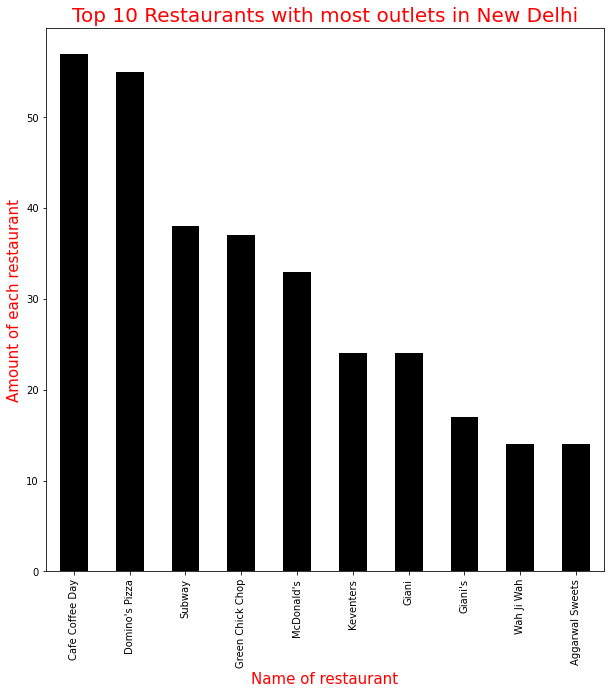

In [37]:
Res_Outlets('New Delhi')

In [130]:
def locality_dist(cityname):
    plt.figure(figsize = (8,25))
    plt.barh(zomato_india[zomato_india['City']==cityname]['Locality'].value_counts().sort_values().index,zomato_india[zomato_india['City']==cityname]['Locality'].value_counts().sort_values())
    plt.ylabel('{} Localities'.format(cityname), fontsize = 15)
    plt.xlabel('Count', fontsize = 15)
    plt.title('Distribution of Restaurants in {} Localities'.format(cityname), fontsize = 20)
    plt.grid( linestyle='-', linewidth=1, axis='x', alpha=0.5)

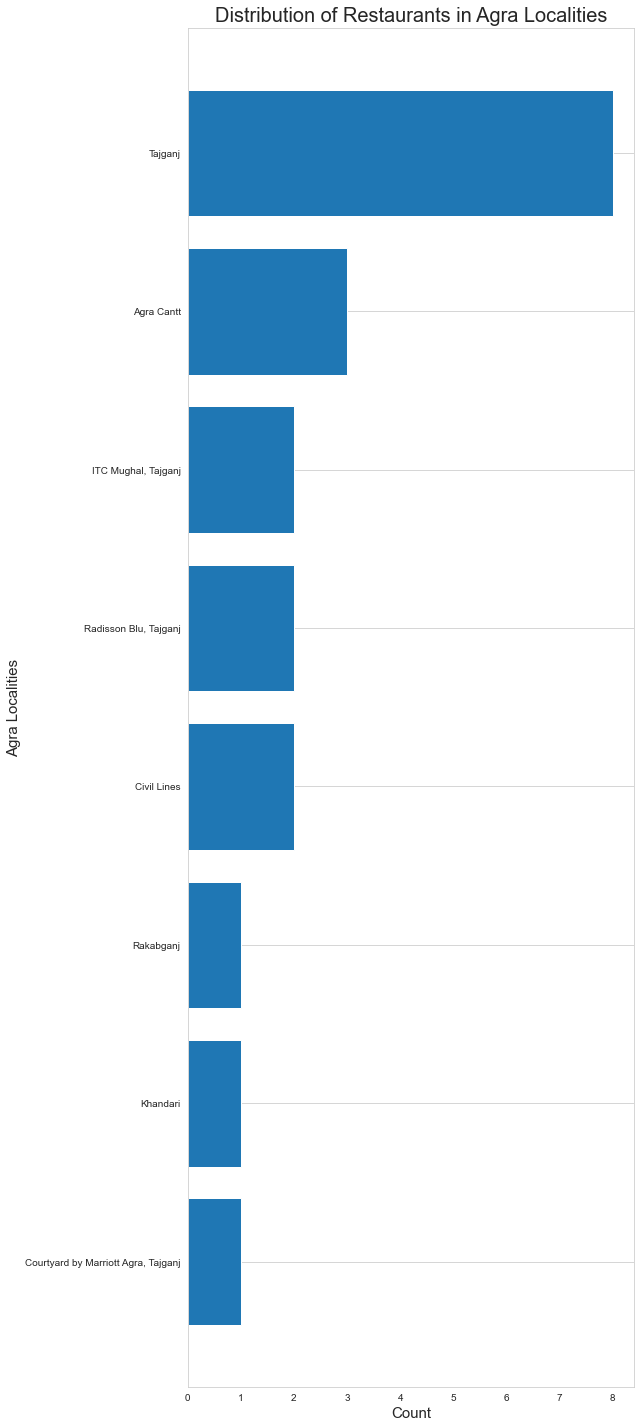

In [131]:
locality_dist('Agra')

In [151]:
plt.figure(figsize=(15,8))
sns.set_style(style='whitegrid')
px.scatter(zomato_india,x="Average Cost for two",y="Aggregate rating",color='Price range' )

<Figure size 1080x576 with 0 Axes>

In [152]:
plt.figure(figsize=(15,8))
px.scatter(zomato_india,x="Aggregate rating",y="Price range",color='Has Online delivery' )
px.scatter(zomato_india,x="Aggregate rating",y="Votes",color='Has Online delivery' )

<Figure size 1080x576 with 0 Axes>

In [154]:
plt.figure(figsize=(15,8))
px.scatter(zomato_india,x="Aggregate rating",y="Price range",color='Has Table booking' )
px.scatter(zomato_india,x="Aggregate rating",y="Votes",color='Has Table booking' )

<Figure size 1080x576 with 0 Axes>